# Final Project : Evlauating the Movie Business for Microsoft's next big move!
The goal of this project is to analyze data from imdb to assist Microsoft, or any new player, in taking on the film industry. I use the **'tn.movie_budgets.csv.gz'** and **im.db** to analyze the budget and movie details for each film. Then, I will provide conclusions for the client to use in the future.

## Opening the file
The 1st thing to do is to open the file. Below, I will import the relevant libraries and created a Pandas Dataframe called **df_1**.


In [1]:
#import file, reading and showing it

import csv
import gzip
import pandas as pd

g=gzip.open('tn.movie_budgets.csv.gz')
file_content=g.read()

df_1 = pd.read_csv('tn.movie_budgets.csv.gz')
df_1


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Next, I create a new column called 'Year' using Pandas DatetimeIndex class.


In [2]:
# Creating a year column
df_1['Year'] = pd.DatetimeIndex(df_1['release_date']).year  


## Preparing and Cleaning

* First, I have to limit the year to 2012 and above. It's a little arbitrary but it's still a lot of data plus many of the relevant players were already around by that time. 
* I would like to create a 'foreign_gross' column that is the difference between the worldwide and domestic gross. Unfortunately, right now, the budget and both gross figures are strings and not integers.
* Lastly, I will create ROI% columns.

In [3]:
#Limiting to past 10 years
df_1=df_1.loc[df_1['Year'] > 2011]
df_1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,"$15,000",$0,$0,2014
5771,72,"May 19, 2015",Family Motocross,"$10,000",$0,$0,2015
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",2012
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018


Then, I use a lambda function to replace the $ sign with an empty space:


In [4]:
df_1 = df_1.assign(production_budget= (df_1['production_budget'].apply(lambda x: x.replace('$', ''))))
df_1 = df_1.assign(domestic_gross= (df_1['domestic_gross'].apply(lambda x: x.replace('$', ''))))
df_1 = df_1.assign(worldwide_gross= (df_1['worldwide_gross'].apply(lambda x: x.replace('$', ''))))



Now, I employ more lambda functions to get rid of the commas (,) inside every monetary value:


In [5]:
df_1 = df_1.assign(production_budget= (df_1['production_budget'].apply(lambda x: x.replace(',', ''))))
df_1 = df_1.assign(domestic_gross= (df_1['domestic_gross'].apply(lambda x: x.replace(',', ''))))
df_1 = df_1.assign(worldwide_gross= (df_1['worldwide_gross'].apply(lambda x: x.replace(',', ''))))

The love affair with lambda functions continues as each column will be converted from a string into an integer:

In [6]:
df_1 = df_1.assign(production_budget= (df_1['production_budget'].apply(lambda x: int(x))))
df_1 = df_1.assign(domestic_gross= (df_1['domestic_gross'].apply(lambda x: int(x))))
df_1 = df_1.assign(worldwide_gross= (df_1['worldwide_gross'].apply(lambda x: int(x))))
df_1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014
5771,72,"May 19, 2015",Family Motocross,10000,0,0,2015
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018


Now, all of our budget and gross numbers are integers !


Finally, I can substract 'worldwide_gross' from 'domestic_gross' to get the foreign_gross:

In [7]:
df_1 ['foreign_gross']= df_1['worldwide_gross']- df_1['domestic_gross']


Lastly, I want to create a total profit column which is simply 'worldwide_gross' - 'production_budget' and also domestic, foreign, and worldwide_ROI respectively. These are easy ways to measure profitability. 

In [8]:
# creating  total profit, worldwide ROI%, domestic ROI%, and foreign ROI% columns

df_1['total_profit']= df_1['worldwide_gross']- df_1['production_budget']
df_1['worldwide_ROI %']= (df_1['worldwide_gross'] / df_1['production_budget'])*100
df_1['domestic_ROI %']= (df_1['domestic_gross'] / df_1['production_budget'])*100
df_1['foreign_ROI %']= (df_1['foreign_gross'] / df_1['production_budget'])*100
df_1

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross,total_profit,worldwide_ROI %,domestic_ROI %,foreign_ROI %
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000,-200237650,42.789243,12.217814,30.571429
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095,1072413963,424.384139,138.840250,285.543888
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,696540365,999721747,415.369636,195.640815,219.728822
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1116648995,1747311220,671.016739,306.098766,364.917972
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718,1748134200,682.711400,226.271827,456.439573
...,...,...,...,...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0,-15000,0.000000,0.000000,0.000000
5771,72,"May 19, 2015",Family Motocross,10000,0,0,2015,0,-10000,0.000000,0.000000,0.000000
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0,-4416,50.933333,50.933333,0.000000
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0,-7000,0.000000,0.000000,0.000000


## Opening up SQL File "im.db.zip"
* This is pretty simple. I will import zipfile.
* Import SQLite3.
* Then, I will make the table into a Pandas Dataframe by selecting pieces of relevant data.

In [9]:
# import zipfile
import zipfile
with zipfile.ZipFile("im.db.zip","r") as zip_ref:
    zip_ref.extractall(None)

In [10]:
# opening sqlite3 to access database
import sqlite3
import sqlalchemy 

try:
    conn = sqlite3.connect("im.db")    
except Exception as e:
    print(e)

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Table Name : {cursor.fetchall()}")

df = pd.read_sql_query('SELECT * FROM known_for', conn)

Table Name : [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


Here, I am choosing the 'genres', 'primary_title', movie_id, and 'runtime_minutes' columns. They will be analyzed. 'primary_title' could be useful when I merge with df_1.

The other columns are irrelevant for our purposes.

Maybbe I'll need them later though.

In [11]:
# Selecting movie_basics table to access genres and runtimes
df_0=pd.read_sql("""
SELECT genres,
primary_title,
movie_id,
runtime_minutes
FROM movie_basics

;""", conn)
df_0

,genres,primary_title,movie_id,runtime_minutes
0,"Action,Crime,Drama",Sunghursh,tt0063540,175.0
1,"Biography,Drama",One Day Before the Rainy Season,tt0066787,114.0
2,Drama,The Other Side of the Wind,tt0069049,122.0
3,"Comedy,Drama",Sabse Bada Sukh,tt0069204,NaN
4,"Comedy,Drama,Fantasy",The Wandering Soap Opera,tt0100275,80.0
...,...,...,...,...
146139,Drama,Kuambil Lagi Hatiku,tt9916538,123.0
146140,Documentary,Rodolpho Teóphilo - O Legado de um Pioneiro,tt9916622,NaN
146141,Comedy,Dankyavar Danka,tt9916706,NaN
146142,None,6 Gunn,tt9916730,116.0


Here we go. M&A Pandas style! I use an inner merge where every common 'movie' from df_1 and 'primary_title' from df_0 come together:

In [12]:
#joining dataframes 
by_genre_df=df_1.merge(df_0, how= 'inner', left_on='movie', right_on='primary_title')
by_genre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross,total_profit,worldwide_ROI %,domestic_ROI %,foreign_ROI %,genres,primary_title,movie_id,runtime_minutes
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000,-200237650,42.789243,12.217814,30.571429,"Action,Adventure,Sci-Fi",Dark Phoenix,tt6565702,113.0
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095,1072413963,424.384139,138.840250,285.543888,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,tt2395427,141.0
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718,1748134200,682.711400,226.271827,456.439573,"Action,Adventure,Sci-Fi",Avengers: Infinity War,tt4154756,149.0
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,426920914,355945209,218.648403,76.341432,142.306971,"Action,Adventure,Fantasy",Justice League,tt0974015,120.0
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,679546748,579620923,293.206974,66.691392,226.515583,"Action,Adventure,Thriller",Spectre,tt2379713,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,57,"Apr 21, 2015",The Front Man,20000,0,0,2015,0,-20000,0.000000,0.000000,0.000000,"Biography,Comedy,Documentary",The Front Man,tt2357398,73.0
2054,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0,-15000,0.000000,0.000000,0.000000,Drama,Stories of Our Lives,tt3973612,60.0
2055,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0,-4416,50.933333,50.933333,0.000000,"Comedy,Drama",Newlyweds,tt1880418,95.0
2056,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0,-7000,0.000000,0.000000,0.000000,"Horror,Sci-Fi,Thriller",Red 11,tt7837402,77.0


Let's use df.drop to eliminate duplicates by finding duplicate  any 'movie_id' and then deleting all but the 1st one.

In [13]:
# dropping duplicates
by_genre_df.drop_duplicates(subset='movie_id', keep='first', inplace=True, ignore_index=False)
by_genre_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,foreign_gross,total_profit,worldwide_ROI %,domestic_ROI %,foreign_ROI %,genres,primary_title,movie_id,runtime_minutes
0,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,107000000,-200237650,42.789243,12.217814,30.571429,"Action,Adventure,Sci-Fi",Dark Phoenix,tt6565702,113.0
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,944008095,1072413963,424.384139,138.840250,285.543888,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,tt2395427,141.0
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,1369318718,1748134200,682.711400,226.271827,456.439573,"Action,Adventure,Sci-Fi",Avengers: Infinity War,tt4154756,149.0
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,2017,426920914,355945209,218.648403,76.341432,142.306971,"Action,Adventure,Fantasy",Justice League,tt0974015,120.0
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,2015,679546748,579620923,293.206974,66.691392,226.515583,"Action,Adventure,Thriller",Spectre,tt2379713,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,57,"Apr 21, 2015",The Front Man,20000,0,0,2015,0,-20000,0.000000,0.000000,0.000000,"Biography,Comedy,Documentary",The Front Man,tt2357398,73.0
2054,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,2014,0,-15000,0.000000,0.000000,0.000000,Drama,Stories of Our Lives,tt3973612,60.0
2055,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,2012,0,-4416,50.933333,50.933333,0.000000,"Comedy,Drama",Newlyweds,tt1880418,95.0
2056,78,"Dec 31, 2018",Red 11,7000,0,0,2018,0,-7000,0.000000,0.000000,0.000000,"Horror,Sci-Fi,Thriller",Red 11,tt7837402,77.0


600+ duplicates were dropped!

1 last piece of business: Re-ordering the table column.I want year, genre, and runtime to be more prominent. Also, I can just drop primary_title but simply not including it.


Here is how to do it:

In [14]:
#re-ordering columns
columnsTitles = ['movie', 'movie_id', 'Year', 'genres', 'runtime_minutes','production_budget', 'domestic_gross', 'foreign_gross','worldwide_gross', 'total_profit', 'domestic_ROI %', 'foreign_ROI %', 'worldwide_ROI %']


by_genre_df = by_genre_df.reindex(columns=columnsTitles)
by_genre_df

,movie,movie_id,Year,genres,runtime_minutes,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,domestic_ROI %,foreign_ROI %,worldwide_ROI %
0,Dark Phoenix,tt6565702,2019,"Action,Adventure,Sci-Fi",113.0,350000000,42762350,107000000,149762350,-200237650,12.217814,30.571429,42.789243
1,Avengers: Age of Ultron,tt2395427,2015,"Action,Adventure,Sci-Fi",141.0,330600000,459005868,944008095,1403013963,1072413963,138.840250,285.543888,424.384139
2,Avengers: Infinity War,tt4154756,2018,"Action,Adventure,Sci-Fi",149.0,300000000,678815482,1369318718,2048134200,1748134200,226.271827,456.439573,682.711400
3,Justice League,tt0974015,2017,"Action,Adventure,Fantasy",120.0,300000000,229024295,426920914,655945209,355945209,76.341432,142.306971,218.648403
4,Spectre,tt2379713,2015,"Action,Adventure,Thriller",148.0,300000000,200074175,679546748,879620923,579620923,66.691392,226.515583,293.206974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,The Front Man,tt2357398,2015,"Biography,Comedy,Documentary",73.0,20000,0,0,0,-20000,0.000000,0.000000,0.000000
2054,Stories of Our Lives,tt3973612,2014,Drama,60.0,15000,0,0,0,-15000,0.000000,0.000000,0.000000
2055,Newlyweds,tt1880418,2012,"Comedy,Drama",95.0,9000,4584,0,4584,-4416,50.933333,0.000000,50.933333
2056,Red 11,tt7837402,2018,"Horror,Sci-Fi,Thriller",77.0,7000,0,0,0,-7000,0.000000,0.000000,0.000000


Wait a minute! If I am going to use 'genres' and 'runtime_minutes' for analysis then I must use fillna to eliminate null values. For 'genres', I simply replace null values with 'Undetermined'. For 'runtime_minutes', I replace them with the median of the 'runtime_minutes' column.

In [15]:
# replacing null values in 'genres' and 'runtime_minutes'
by_genre_df['genres'].fillna('Undetermined', inplace=True)
by_genre_df['runtime_minutes'].fillna(by_genre_df['runtime_minutes'].median(), inplace=True)

## Analysis and Visualization
* Let's look at the data!
    * First, let's examine the genres with highest ROI.
    * Then, we'll examine ROI by runtime.
    * Finally, we'll find the top 5 directors by ROI.


I will import the relevant libraries:

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

I need to separate these films by genre if I am going to analyze them. So, let's use str.contains to make a list for each genre. Below is the result for the Adventure genre.

In [17]:
# Isolating genres

Adventure=by_genre_df[by_genre_df.genres.str.contains('Adventure')]
Action=by_genre_df[by_genre_df.genres.str.contains('Action')]
Romance=by_genre_df[by_genre_df.genres.str.contains('Romance')]
Drama=by_genre_df[by_genre_df.genres.str.contains('Drama')]
Comedy=by_genre_df[by_genre_df.genres.str.contains('Comedy')]
Horror=by_genre_df[by_genre_df.genres.str.contains('Horror')]
Sci_Fi=by_genre_df[by_genre_df.genres.str.contains('Sci-Fi')]
Thriller=by_genre_df[by_genre_df.genres.str.contains('Thriller')]
Fantasy=by_genre_df[by_genre_df.genres.str.contains('Fantasy')]
Undetermined=by_genre_df[by_genre_df.genres.str.contains('Undetermined')]
Documentary=by_genre_df[by_genre_df.genres.str.contains('Documentary')]
Adventure

,movie,movie_id,Year,genres,runtime_minutes,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,domestic_ROI %,foreign_ROI %,worldwide_ROI %
0,Dark Phoenix,tt6565702,2019,"Action,Adventure,Sci-Fi",113.0,350000000,42762350,107000000,149762350,-200237650,12.217814,30.571429,42.789243
1,Avengers: Age of Ultron,tt2395427,2015,"Action,Adventure,Sci-Fi",141.0,330600000,459005868,944008095,1403013963,1072413963,138.840250,285.543888,424.384139
2,Avengers: Infinity War,tt4154756,2018,"Action,Adventure,Sci-Fi",149.0,300000000,678815482,1369318718,2048134200,1748134200,226.271827,456.439573,682.711400
3,Justice League,tt0974015,2017,"Action,Adventure,Fantasy",120.0,300000000,229024295,426920914,655945209,355945209,76.341432,142.306971,218.648403
4,Spectre,tt2379713,2015,"Action,Adventure,Thriller",148.0,300000000,200074175,679546748,879620923,579620923,66.691392,226.515583,293.206974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,Rodeo Girl,tt4062896,2015,"Adventure,Family",108.0,500000,0,0,0,-500000,0.000000,0.000000,0.000000
1978,The Love Letter,tt1950401,2015,"Adventure,Documentary",12.0,250000,0,0,0,-250000,0.000000,0.000000,0.000000
1979,Western Religion,tt3210710,2015,"Adventure,Drama,Fantasy",105.0,250000,0,0,0,-250000,0.000000,0.000000,0.000000
2013,Closure,tt2405862,2015,"Adventure,Biography,Documentary",76.0,100000,0,0,0,-100000,0.000000,0.000000,0.000000


Let's find the median value for each and graph the top 5. For this, I have to use **itemgetter**.

In [28]:
from operator import itemgetter, attrgetter

domestic_genre_cor= {'Adventure': Adventure['worldwide_ROI %'].median(),
           'Action': Action['worldwide_ROI %'].median(),
           'Romance':Romance['worldwide_ROI %'].median(),
           'Drama':Drama['worldwide_ROI %'].median(),
           'Comedy':Comedy['worldwide_ROI %'].median(),
           'Horror':Horror['worldwide_ROI %'].median(),
           'Sci_Fi':Sci_Fi['worldwide_ROI %'].median(),
           'Thriller':Thriller['worldwide_ROI %'].median(),
           'Fantasy':Fantasy['worldwide_ROI %'].median(),
           'Documentary': Documentary['worldwide_ROI %'].median(),
           'Undetermined':Undetermined['worldwide_ROI %'].median()}
n=sorted(domestic_genre_cor.items(), key=itemgetter(1),reverse=True)[:5]
top_5_genres_df= pd.DataFrame(n)
top_5_genres_df.rename( columns={0 :'Genre', 1:'ROI'}, inplace=True )

Now let's use a bar graph to illustrate the 5 highest genres by ROI.

Text(0, 0.5, 'ROI')

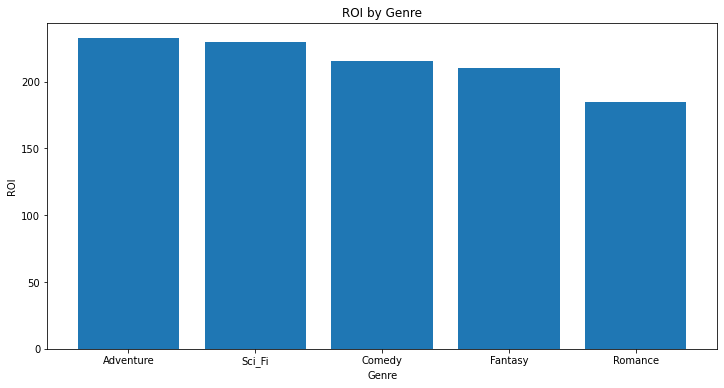

In [29]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
ax1.bar(
    x=top_5_genres_df['Genre'],
    height=top_5_genres_df['ROI']
)
ax1.set_title("ROI by Genre")
ax1.set_xlabel("Genre")
ax1.set_ylabel("ROI")

Hmmm...this leads to Recommendation #1: **Make Adventure, Sci-Fi, Comedy, Fantasy, Action, and Romance Films because they make the most money**.

 Now let's examine runtimes:

Here's the description for runtimes:

* count    1416.000000
* mean      105.326977
* std        19.035017
* min        11.000000
* 25%        93.000000
* 50%       103.000000
* 75%       116.000000
* max       180.000000

I am going to use the 25th percentile as the 'short_film' threshold, the 25-75th percentiles for the 'average_length_film' threshold, and the 75th percentile as the 'long_film' threshold.

In [21]:
#Creating new tables based on runtime
# median runtime is 103
run=by_genre_df["runtime_minutes"] 
# Up to 80 minutes
short_film = by_genre_df[run <= by_genre_df['runtime_minutes'].quantile(.25)]
# From 80+ to 116 minutes
average_length_film = by_genre_df[(run >90 )& (run <= 115) ]
# Over 116 minutes
long_film = by_genre_df[run >by_genre_df['runtime_minutes'].quantile(.75)]

Now let's define the median for each length. I will use the median as the average.

In [22]:
long_film = by_genre_df[run >by_genre_df['runtime_minutes'].quantile(.75)]
long_film_ROI=long_film['worldwide_ROI %'].median()
average_length_film_ROI=average_length_film['worldwide_ROI %'].median()
short_film_ROI=short_film['worldwide_ROI %'].median()
average_length_film_ROI

144.15465335664334

Now let's make a bar graph! 
* First, let's make a dictionary called 'film_length_ROIs' that includes all the median ROIs. 
* Then, let's sort and order. 
* Then, we'll make a DataFrame. 
* Finally, we'll graph the DataFrame.

Text(0, 0.5, 'ROI')

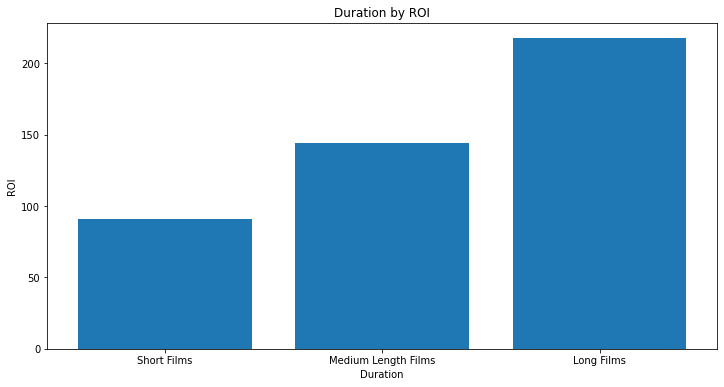

In [23]:
film_length_ROIs={'Short Films':short_film_ROI,
                 'Medium Length Films': average_length_film_ROI,
                 'Long Films':long_film_ROI}
ROIs_by_length=sorted(film_length_ROIs.items(), key=itemgetter(1))
Length_ROIs= pd.DataFrame(ROIs_by_length)

ROIS= pd.DataFrame(ROIs_by_length)
ROIS.rename( columns={0 :'Duration', 1:'ROI'}, inplace=True)
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
ax1.bar(
    x=ROIS['Duration'],
    height=ROIS['ROI']
)
ax1.set_title("Duration by ROI")
ax1.set_xlabel("Duration")
ax1.set_ylabel("ROI")

Recommendation #2: **Make long films. Their median ROI is almost 250%**. Medium length films aren't too bad either at almost 150%.

Now, I want to look at directors by ROI. In order to do that, I must open up a a few new databases.

Let's start by opening up the 'directors' and then the 'movie_akas' table.

In [24]:
df_akas=pd.read_sql("""
SELECT movie_id
FROM movie_akas

;""", conn)
df_akas

,movie_id
0,tt0369610
1,tt0369610
2,tt0369610
3,tt0369610
4,tt0369610
...,...
331698,tt9827784
331699,tt9827784
331700,tt9880178
331701,tt9880178


In [25]:
df_directors=pd.read_sql("""
SELECT *
FROM directors

;""", conn)
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


Now let's merge these 2 tables!

In [26]:
directors_titles= df_akas.merge(df_directors, how='inner')
directors_titles

,movie_id,person_id
0,tt0369610,nm1119880
1,tt0369610,nm1119880
2,tt0369610,nm1119880
3,tt0369610,nm1119880
4,tt0369610,nm1119880
...,...,...
838575,tt9827784,nm0794048
838576,tt9827784,nm0794048
838577,tt9880178,nm7461083
838578,tt9880178,nm7461083


I need the names of the directors. To get the names, I will have to open the 'persons' table and then merge 'persons' with 
'directors'.

In [27]:
df_persons=pd.read_sql("""
SELECT person_id,
primary_name
FROM persons

;""", conn)
df_persons

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


Okay, let's merge these 2 tables!

In [28]:
director_list_df=directors_titles.merge(df_persons, how= 'inner')
director_list_df

,movie_id,person_id,primary_name
0,tt0369610,nm1119880,Colin Trevorrow
1,tt0369610,nm1119880,Colin Trevorrow
2,tt0369610,nm1119880,Colin Trevorrow
3,tt0369610,nm1119880,Colin Trevorrow
4,tt0369610,nm1119880,Colin Trevorrow
...,...,...,...
838563,tt9755806,nm1382072,Tommy Wiseau
838564,tt9755806,nm1382072,Tommy Wiseau
838565,tt9880178,nm7461083,Orencio Carvajal
838566,tt9880178,nm7461083,Orencio Carvajal


Ok, now I need to assign those directors to their respective films. To do that, I am going to merge 'director_list_df' with 'by_genre_df' on their shared 'movie_id' column. It's important to merge on 'movie_id' because it is unique to a film. Then, I will drop duplicates.

In [29]:
Director_movie_df= director_list_df.merge(by_genre_df, how='inner', left_on='movie_id', right_on='movie_id')
Director_movie_df.drop_duplicates(subset='movie', keep='first', inplace=True, ignore_index=False)
Director_movie_df

,movie_id,person_id,primary_name,movie,Year,genres,runtime_minutes,production_budget,domestic_gross,foreign_gross,worldwide_gross,total_profit,domestic_ROI %,foreign_ROI %,worldwide_ROI %
0,tt0369610,nm1119880,Colin Trevorrow,Jurassic World,2015,"Action,Adventure,Sci-Fi",124.0,215000000,652270625,996584239,1648854864,1433854864,303.381686,463.527553,766.909239
240,tt1862079,nm1119880,Colin Trevorrow,Safety Not Guaranteed,2012,"Comedy,Drama,Romance",86.0,750000,4010957,411361,4422318,3672318,534.794267,54.848133,589.642400
253,tt0401729,nm0004056,Andrew Stanton,John Carter,2012,"Action,Adventure,Sci-Fi",132.0,275000000,73058679,209719421,282778100,7778100,26.566792,76.261608,102.828400
389,tt2277860,nm0004056,Andrew Stanton,Finding Dory,2016,"Adventure,Animation,Comedy",97.0,200000000,486295561,534919632,1021215193,821215193,243.147781,267.459816,510.607596
749,tt1077368,nm0000318,Tim Burton,Dark Shadows,2012,"Comedy,Fantasy,Horror",113.0,150000000,79727149,158475519,238202668,88202668,53.151433,105.650346,158.801779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110747,tt5462602,nm0795290,Michael Showalter,The Big Sick,2017,"Comedy,Drama,Romance",120.0,5000000,42872467,11100393,53972860,48972860,857.449340,222.007860,1079.457200
110792,tt4761916,nm0839812,Stephen Susco,Unfriended: Dark Web,2018,"Crime,Horror,Mystery",92.0,1000000,8866745,7567843,16434588,15434588,886.674500,756.784300,1643.458800
110832,tt3702088,nm0483999,Beth LaMure,Daisy Winters,2017,Drama,90.0,4500000,0,0,0,-4500000,0.000000,0.000000,0.000000
110837,tt4550098,nm1053530,Tom Ford,Nocturnal Animals,2016,"Drama,Thriller",116.0,22500000,10663357,21735324,32398681,9898681,47.392698,96.601440,143.994138


Next, I want to limit my DataFrame to films where the 'production_budget' is greater than $5 mil. A budget less than 5mil. is considered a low budget film according to:
 
https://www.studiobinder.com/blog/production-budget/

While there is nothing wrong with low budget films, it's best to filter out the lower budget films.

In [53]:
budget= Director_movie_df.loc[Director_movie_df['production_budget'] >= 5000000]


Next up:
* I will create a new a new dictionary called director_total.  
* Then, I will use .aggregate to add the 'worldwide_ROI %' for each director. 
* Then I will show the top 10 directors.

In [54]:
director_total = { 'primary_name': 'first', 'worldwide_ROI %': 'sum'}
dir_cumulative = budget.groupby(budget['primary_name']).aggregate(director_total)
dir_cumulative.sort_values(by=['worldwide_ROI %']).tail(10)

,primary_name,worldwide_ROI %
primary_name,,
Steven Soderbergh,Steven Soderbergh,2969.685123
Gregori J. Martin,Gregori J. Martin,2976.130200
Nitesh Tiwari,Nitesh Tiwari,3101.627558
James Wan,James Wan,3106.137641
Ariel Schulman,Ariel Schulman,3209.621260
John R. Leonetti,John R. Leonetti,4147.381772
Pierre Coffin,Pierre Coffin,4230.838901
Jordan Peele,Jordan Peele,5107.359020
Christopher Landon,Christopher Landon,5135.106813


Now, let's make the ROI%s into integers.

In [55]:
dir_cumulative['worldwide_ROI %']=dir_cumulative['worldwide_ROI %'].apply(lambda x: int(x))

Actual_dir_total=dir_cumulative['worldwide_ROI %']
Actual_dir_total

primary_name
Adam Green           848
Adam McKay           819
Adam Robitel        1678
Adam Shankman        436
Adam Vermillion       23
                    ... 
Yorgos Lanthimos     627
Zach Braff           437
Zack Snyder          862
Zal Batmanglij        46
Zeljko Mirkovic       11
Name: worldwide_ROI %, Length: 760, dtype: int64

Then, I will make the above list into a dictionary.

In [59]:
Dir_Total_dict=Actual_dir_total.to_dict()


Now:
* Let's sort the dictionary in reverse order using sorted, itemgetter, and reverse=True.
* Then let's make that sorted dictionary into a DataFrame.
* Next, I will rename the columns 'Director' and 'ROI' because they naturally come out as '0' and '1'.
* Lastly, let's take a look at the DataFrame.

In [57]:
Dir_ROI= sorted(Dir_Total_dict.items(), key=itemgetter(1), reverse=True)[:5]
high_return_directors= pd.DataFrame(Dir_ROI)
high_return_directors.rename( columns={0 :'Director', 1:'ROI'}, inplace=True )
high_return_directors

,Director,ROI
0,M. Night Shyamalan,7746
1,Christopher Landon,5135
2,Jordan Peele,5107
3,Pierre Coffin,4230
4,John R. Leonetti,4147


I'll finish it off by graphing the top 5 directors:

Text(0, 0.5, 'ROI')

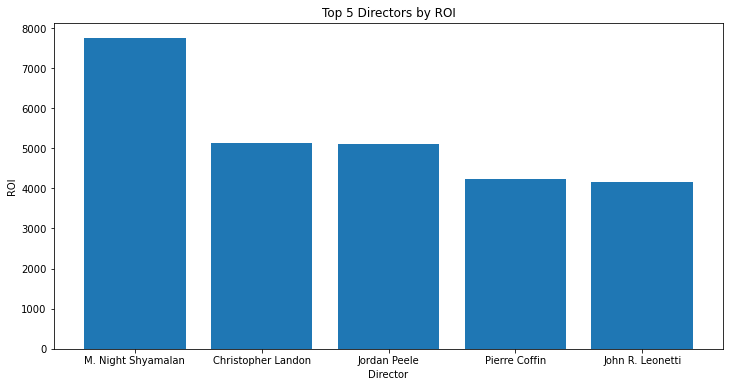

In [58]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
ax1.bar(
    x=high_return_directors['Director'],
    height=high_return_directors['ROI']
)
ax1.set_title("Top 5 Directors by ROI")
ax1.set_xlabel("Director")
ax1.set_ylabel("ROI")

Recommendation # 3: **If at all possible, hire M. Night Shyamalan, Christopher Landon, Jordan Peele, Pierre Coffin, or John R. Leonetti because they have the highest ROI%**.

In [36]:
conn.close()
